<a href="https://colab.research.google.com/github/prof-Anurag/Autism-Prediction-System-Using-ML/blob/main/Autism_Prediction_Uisng_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**Data Loading & Understanding**

In [103]:
# Read the csv data to a pandas dataframe
df = pd.read_csv('/content/Autism_train.csv')

**Initial Inspection**

In [104]:
df.shape

(800, 22)

In [105]:
# To display all columns of a dataframe
pd.set_option('display.max_columns',None)

In [106]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [107]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [109]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [110]:
# Convert age column datatype from float to integer.
df['age'] = df['age'].astype(int)

In [111]:
df.head(3)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1


In [112]:
# Printing the columns name
for col in df.columns:                  #df.columns
  print(col)

ID
A1_Score
A2_Score
A3_Score
A4_Score
A5_Score
A6_Score
A7_Score
A8_Score
A9_Score
A10_Score
age
gender
ethnicity
jaundice
austim
contry_of_res
used_app_before
result
age_desc
relation
Class/ASD


In [113]:
for col in df.columns:
  numerical_features = ['ID','age','result']
  if col not in numerical_features:
    print(f'{col} : {df[col].unique()}')
    print('-'*50)

A1_Score : [1 0]
--------------------------------------------------
A2_Score : [0 1]
--------------------------------------------------
A3_Score : [1 0]
--------------------------------------------------
A4_Score : [0 1]
--------------------------------------------------
A5_Score : [1 0]
--------------------------------------------------
A6_Score : [0 1]
--------------------------------------------------
A7_Score : [1 0]
--------------------------------------------------
A8_Score : [0 1]
--------------------------------------------------
A9_Score : [1 0]
--------------------------------------------------
A10_Score : [1 0]
--------------------------------------------------
gender : ['f' 'm']
--------------------------------------------------
ethnicity : ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice : ['no' 'yes']
-------------------------------

In [114]:
# Drop the column name ID and age_desc.
df = df.drop(columns=['ID','age_desc'])

In [115]:
df.shape

(800, 20)

In [116]:
df.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1


In [117]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [118]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [119]:
# define the mapping dictionary for country names.
country_mapping = {
    'Viet name' : 'Vietname',
    'AmericanSamoa' : 'United Stated',
    'Hong Kong' : 'China'
}

# Replace value in the country column
df['contry_of_res'] = df['contry_of_res'].replace(country_mapping)

In [120]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'United Stated', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China',
       'Angola', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [121]:
# Target class distribution
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


**Insights :**
1. Missing values in ethinicity and relation column.
2.age_desc column has only 1 unique value. So it is removed as it is not an import for prediction.
3. Fixed country names.
4. Identified class imbalance in the target column.

## **Exploratory Data Analysis (EDA)**

In [122]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Univariate Analysis for Numerical Columns:


*   age
*   result



In [123]:
# Set the desired theme
sns.set_theme(style="darkgrid")

Mean Age:  27.96375
Median Age:  24.0


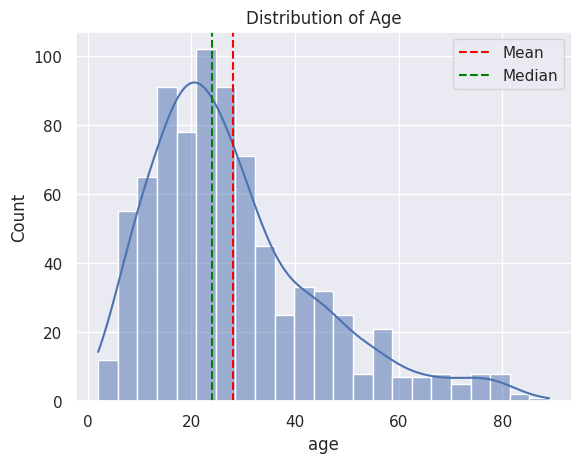

In [124]:
# Historgram for age
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')

# Calculate Mean and Median
mean_age = df['age'].mean()
median_age = df['age'].median()

print('Mean Age: ',mean_age)
print('Median Age: ',median_age)

# Add Verical line for Mean and Median
plt.axvline(mean_age, color='red', linestyle='dashed', label='Mean')
plt.axvline(median_age, color='green', linestyle='dashed', label='Median')
plt.legend()
plt.show()

Mean Age:  8.537303106501248
Median Age:  9.605299308


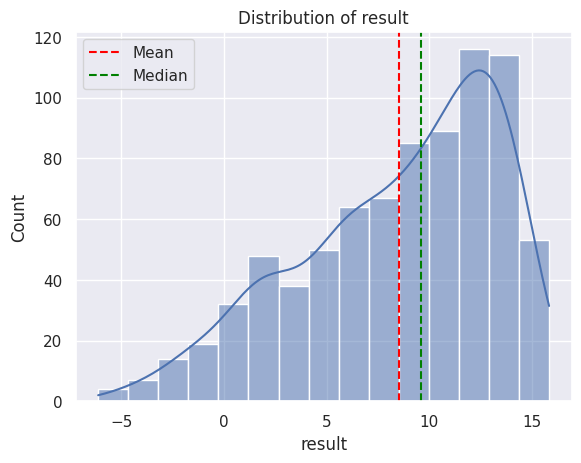

In [125]:
# Historgram for result
sns.histplot(df['result'], kde=True)
plt.title('Distribution of result')

# Calculate Mean and Median
mean_result = df['result'].mean()
median_result = df['result'].median()

print('Mean Age: ',mean_result)
print('Median Age: ',median_result)

# Add Verical line for Mean and Median
plt.axvline(mean_result, color='red', linestyle='dashed', label='Mean')
plt.axvline(median_result, color='green', linestyle='dashed', label='Median')
plt.legend()
plt.show()

Box Plot for Identifying Outliers in the numerical columns.

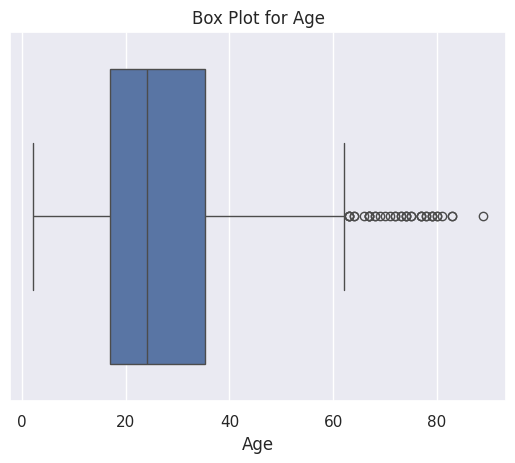

In [126]:
# Box Plot
sns.boxplot(x=df['age'])
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.show()

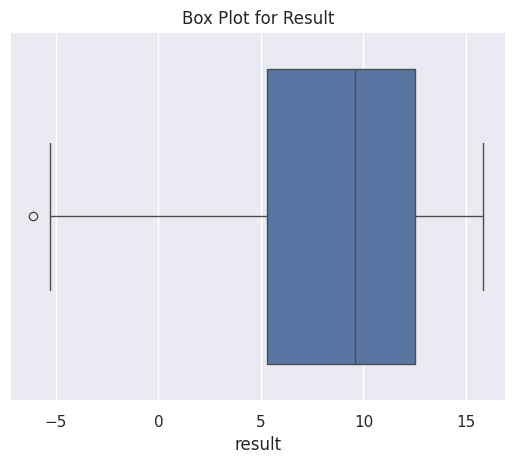

In [127]:
# Box Plot
sns.boxplot(x=df['result'])
plt.title('Box Plot for Result')
plt.xlabel('result')
plt.show()

In [128]:
# Count the outliers using IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

age_outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

In [129]:
len(age_outliers)

39

In [130]:
# Count the outliers using IQR method
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

result_outliers = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]

In [131]:
len(result_outliers)

1

Univariate Analysis for Categorical columns.


In [132]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

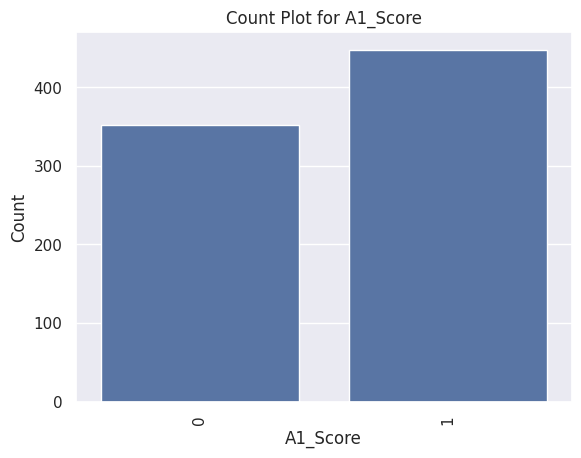

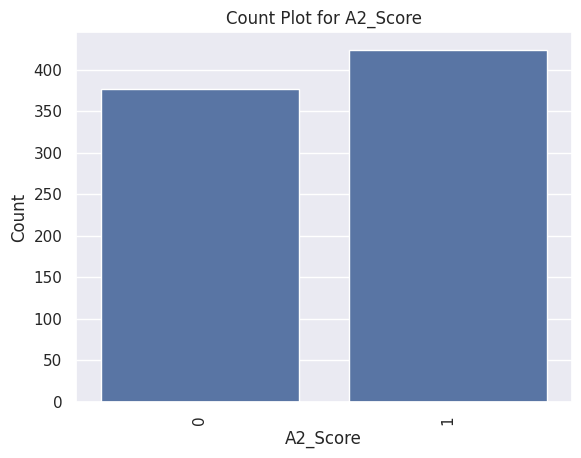

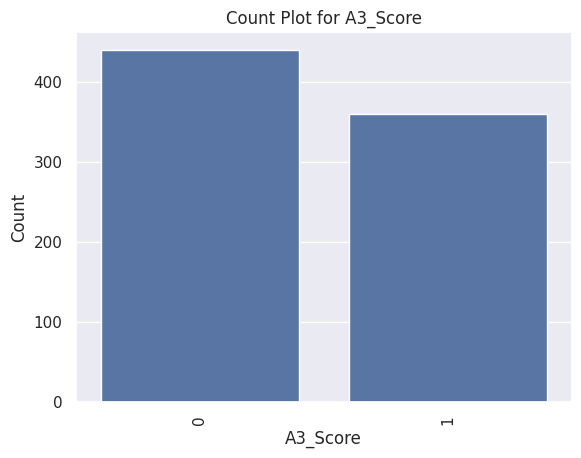

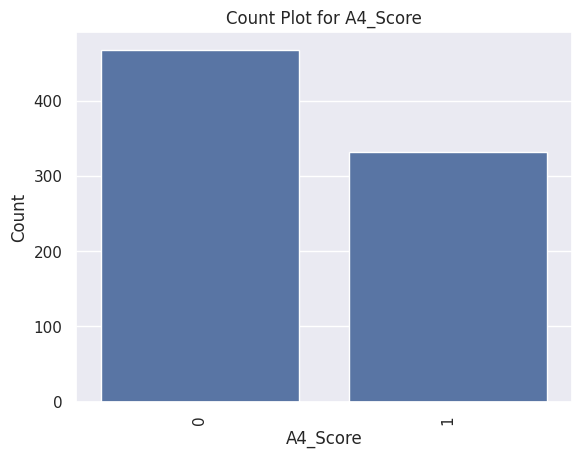

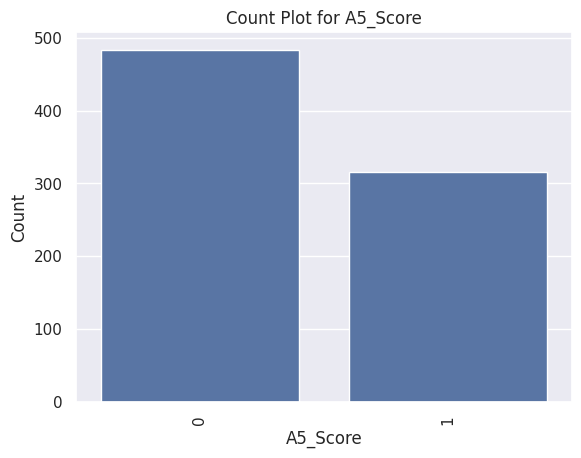

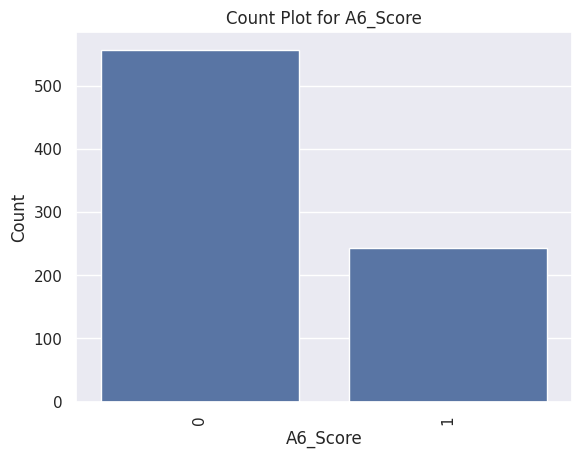

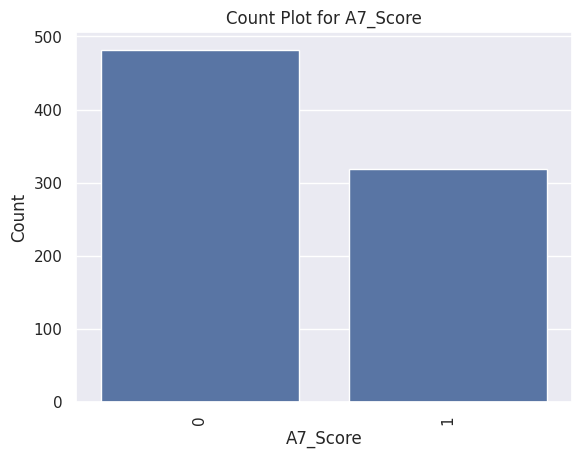

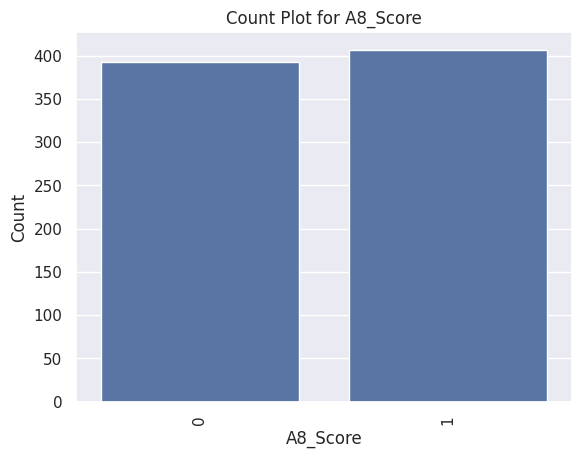

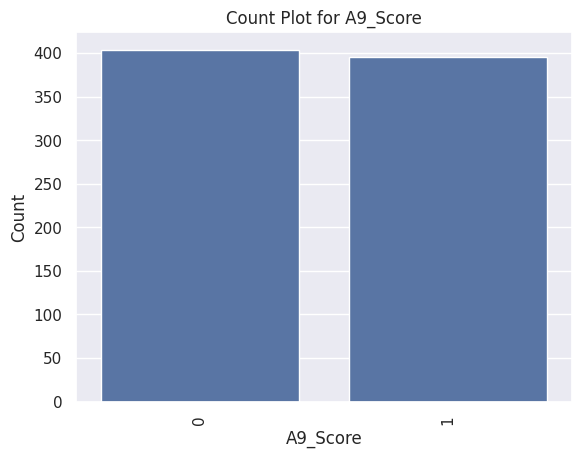

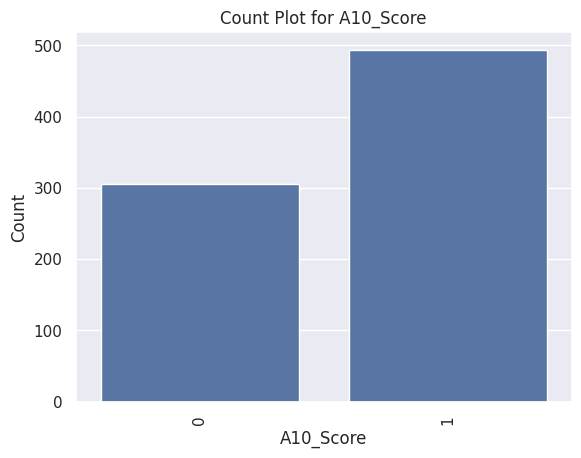

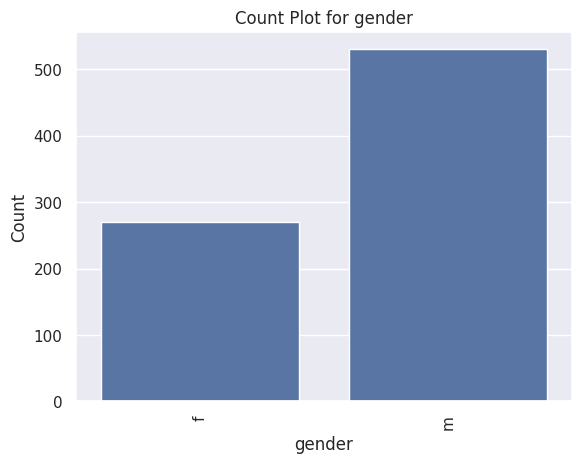

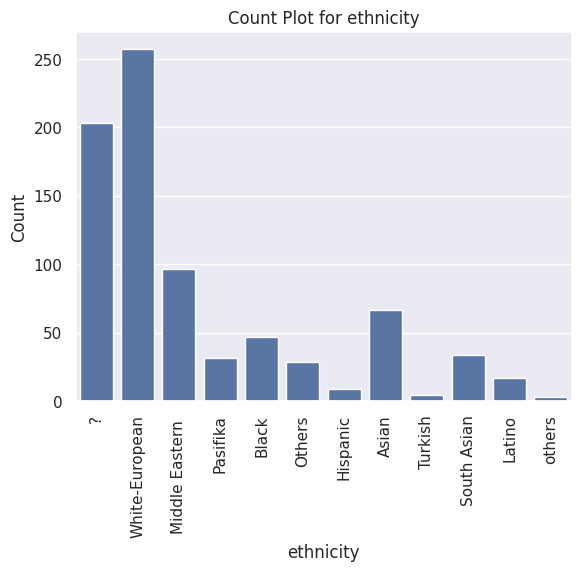

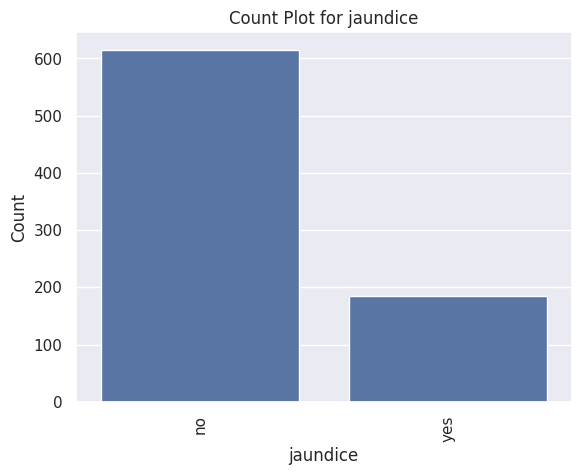

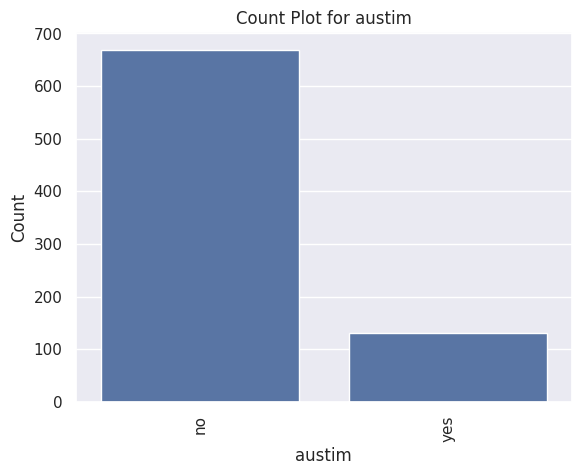

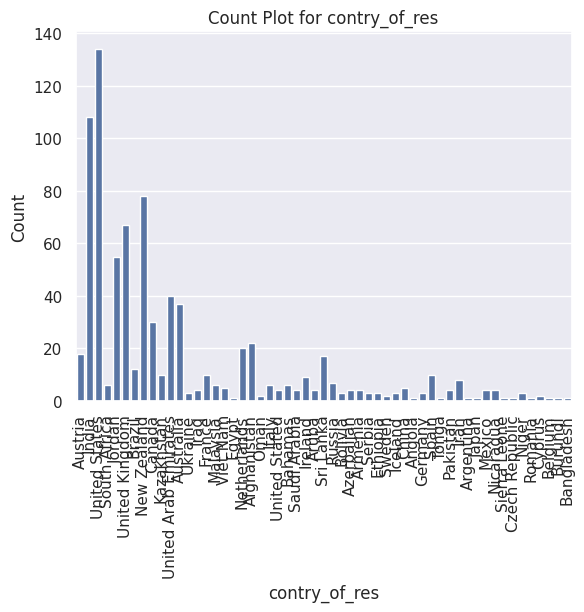

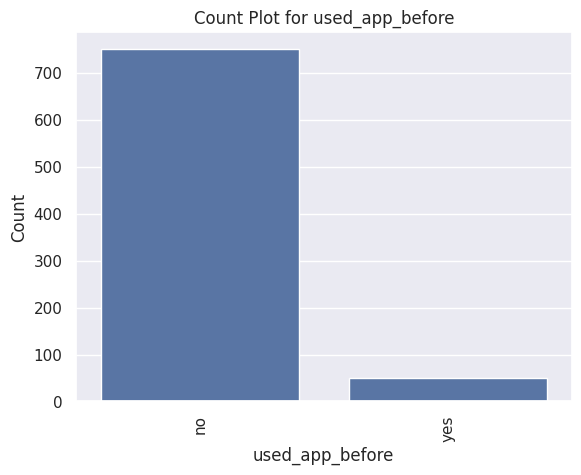

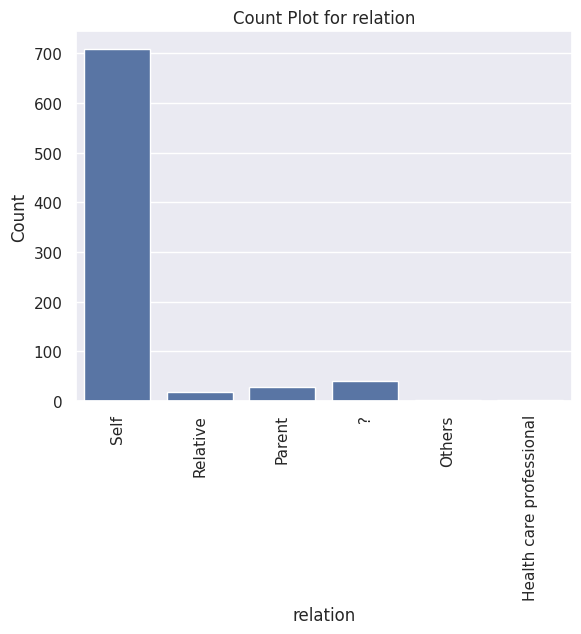

In [133]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f'Count Plot for {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()

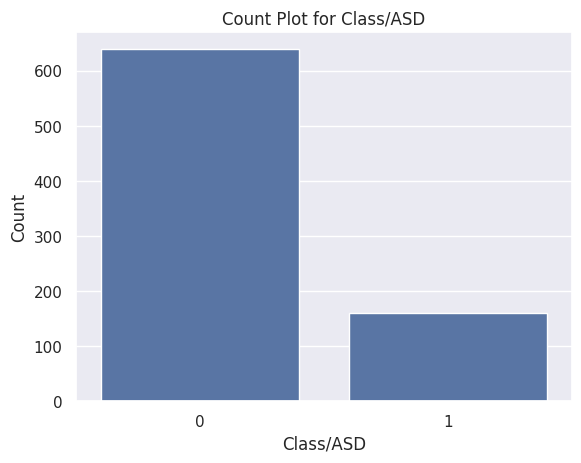

In [134]:
# Countplot for target column (class/ASD)
sns.countplot(x=df['Class/ASD'])
plt.title('Count Plot for Class/ASD')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

Handle Missing value in ethinicity and relation column.

In [135]:
df['ethnicity'] = df['ethnicity'].replace({'?' : 'Others', "others" : "Others"})
df['relation'] = df['relation'].replace(
    {'?' : 'Others',
     "Relative" : "Others",
     "Parent" : "Others",
     "Health care professional" : "Others"
     }
    )

In [136]:
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [137]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [138]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


**Label Encoding**

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    int64  
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

In [140]:
# Identify columns with "object" data type
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [141]:
# Initialize a dictionary to store the encoders
label_encoders = {}

# Loop through each column and apply label encoding
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder

# Save the encoders as a pickle file
with open("label_encoders.pkl", "wb") as file:
  pickle.dump(label_encoders, file)

In [142]:
label_encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [143]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    int64  
 11  gender           800 non-null    int64  
 12  ethnicity        800 non-null    int64  
 13  jaundice         800 non-null    int64  
 14  austim           800 non-null    int64  
 15  contry_of_res    800 non-null    int64  
 16  used_app_before  800 non-null    int64  
 17  result          

**Bivariate Analysis**

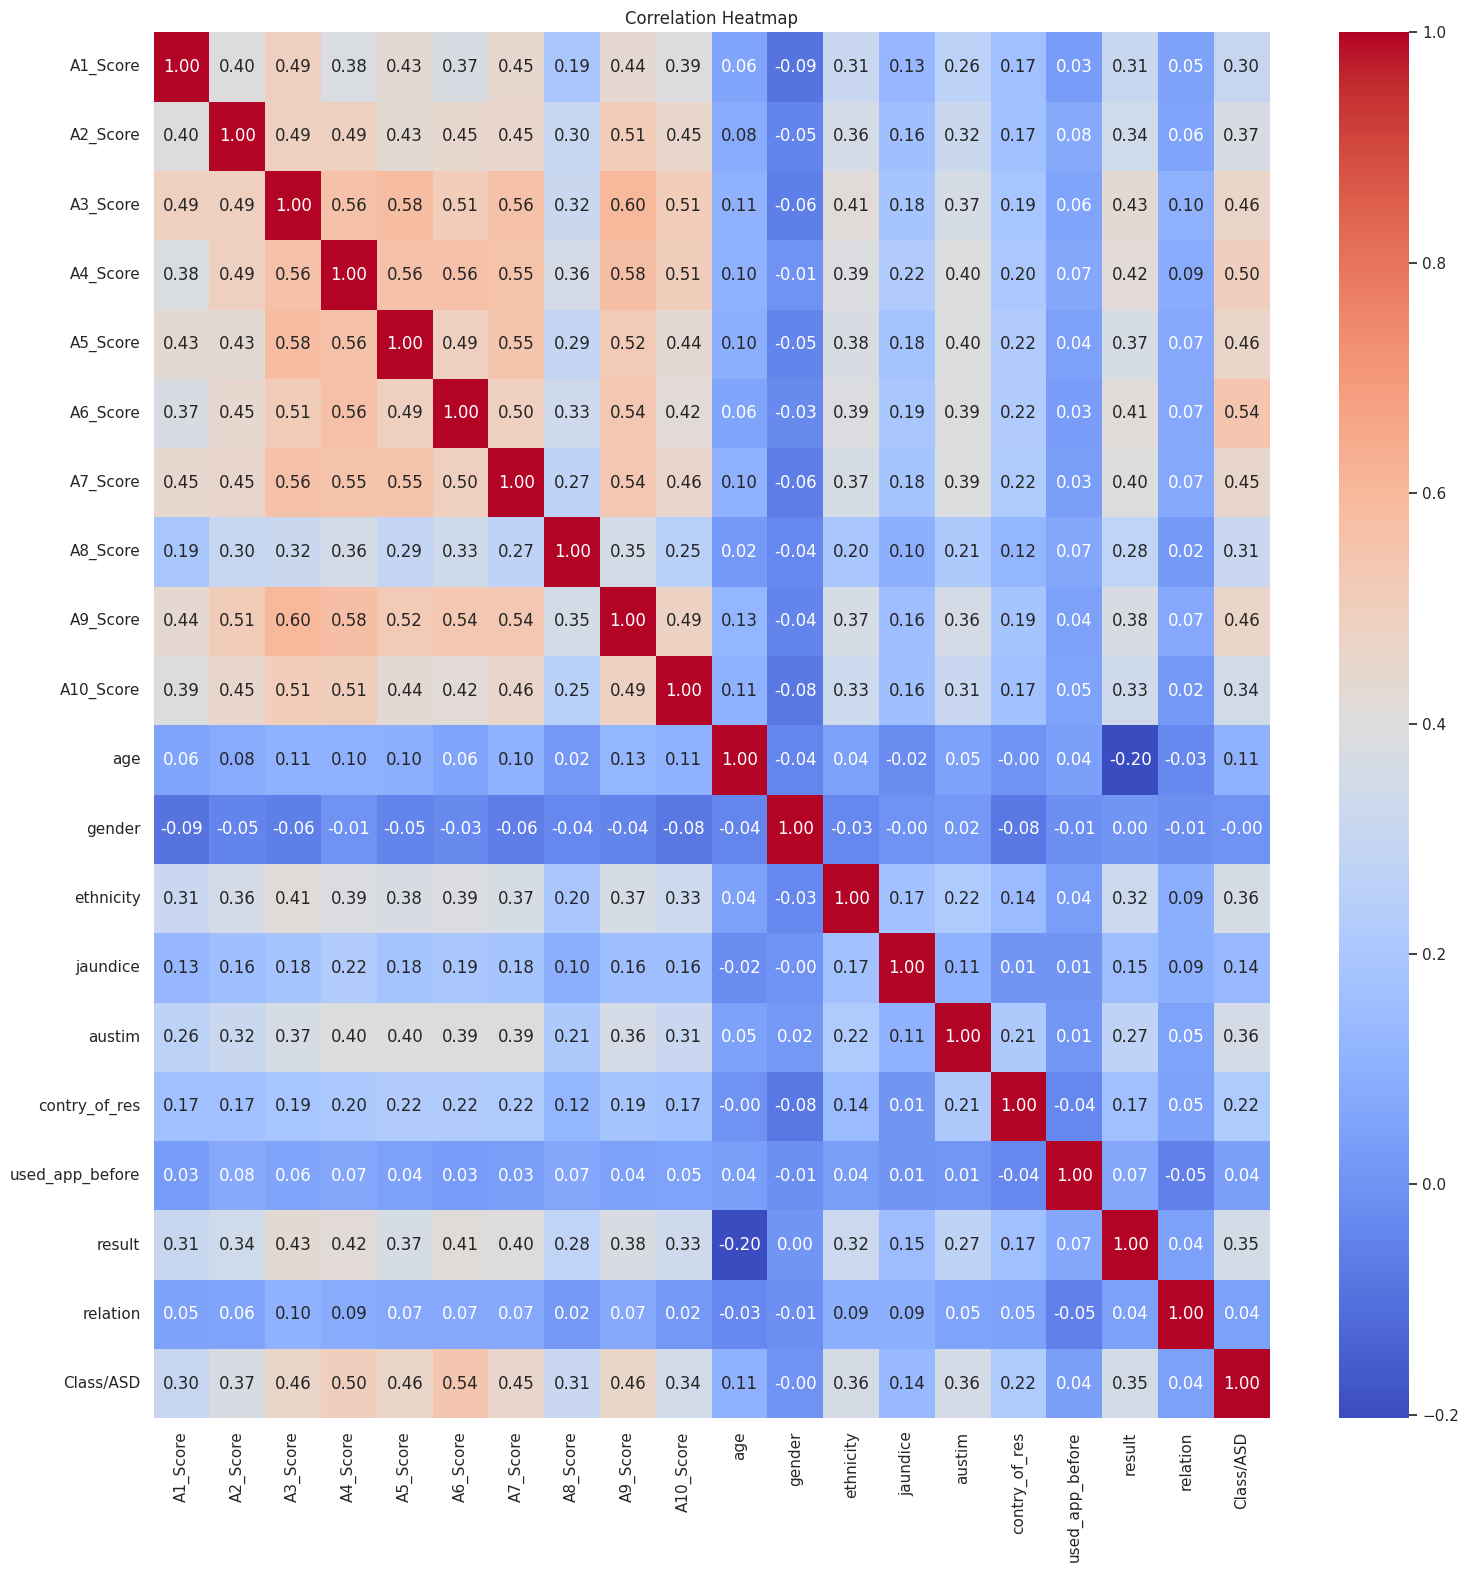

In [145]:
# Correlation matrix
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Insights from EDA**
1. There are few outliers in the
numerical columns (age, result)
2. There is a class imbalance in the target column
3. There is a class imbalance in the categorical columns.
4. We don't have any highly correlated column.
5. Performed label encoding and saved the encoders.

**Data Preprocessing**

Handling the outliers.

In [146]:
#  Function to replace the outliers with medain value
def replace_outliers_with_median(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  # Replace outliers with median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
  return df

In [147]:
# Replace outliers in the 'age' column
df = replace_outliers_with_median(df,'age')

# Replace outliers in the 'result' column
df = replace_outliers_with_median(df,'result')

In [148]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [149]:
df.shape

(800, 20)

**Train Test Split**

In [150]:
X = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']

In [151]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1


In [152]:
y.head()

,Class/ASD
0,0
1,0
2,1
3,0
4,0


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 19)
(160, 19)
(640,)
(160,)


In [155]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [156]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


***SMOTE (Synthetic Minority Oversampling Technique)***

In [157]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [158]:
y_train_smote.shape

(1030,)

In [159]:
y_train_smote.value_counts()

,count
Class/ASD,
1,515
0,515


**Model Training**

In [160]:
# List of Classifiers
models = {
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'XGBoost' : XGBClassifier(random_state=42)
}


In [161]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}


In [162]:
# Dictionary to store the cross validation results
cv_results = {}

# Perform cross validation and store the results
for model_name, model in models.items():
  print(f'Training {model_name} with default parameters...')
  cv_score = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
  cv_results[model_name] = np.mean(cv_score)
  print(f'Cross Validation Accuracy for {model_name}: {np.mean(cv_score)}')
  print('-'*50)

Training Decision Tree with default parameters...
Cross Validation Accuracy for Decision Tree: 0.8563106796116504
--------------------------------------------------
Training Random Forest with default parameters...
Cross Validation Accuracy for Random Forest: 0.9135922330097088
--------------------------------------------------
Training XGBoost with default parameters...
Cross Validation Accuracy for XGBoost: 0.9
--------------------------------------------------


In [163]:
cv_results

{'Decision Tree': np.float64(0.8563106796116504),
 'Random Forest': np.float64(0.9135922330097088),
 'XGBoost': np.float64(0.9)}

Model Selection and Hyperparameter Tuning

In [164]:
# Initializing models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

In [165]:
# Hyperparameter grids for RandomizedSerachCV
param_grid_dt = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 10, 20, 30, 50, 70],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

param_grid_rf = {
    'n_estimators' : [50, 100, 300, 500],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1,2,4],
    'bootstrap' : [True, False]
}

param_grid_xgb = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 7, 10],
    'learning_rate' : [0.01, 0.1, 0.2, 0.3],
    'subsample' : [0.5, 0.7, 1.0],
    'colsample_bytree' : [0.5, 0.7, 1.0]
}

In [166]:
# Hyperparameter tuning for 3 tree based models
# The below steps can be automated by using loop or by using a pipeline
# Perform RandomizedSearchCV for each model

random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring='accuracy', random_state=42)



In [167]:
# Fit the models
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [168]:
# Get the model with the best score
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_

  print(f'Decision Tree: Best Score = {best_score}')

if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_

  print(f'Random Forest: Best Score = {best_score}')

if random_search_xgb.best_score_ > best_score:
  best_score = random_search_xgb.best_score_
  best_model = random_search_xgb.best_estimator_

  print(f'XGBoost: Best Score = {best_score}')

Decision Tree: Best Score = 0.8592233009708737
Random Forest: Best Score = 0.9203883495145633


In [169]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
Best Cross-Validation Accuracy: 0.92


In [170]:
# Save the best model
with open('best_model.pkl', 'wb') as file:
  pickle.dump(best_model, file)

**Model Evaluation**

In [171]:
# Evaluate on test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')
print('\nClassification Report:\n',classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Test Accuracy: 0.83125

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       124
           1       0.61      0.69      0.65        36

    accuracy                           0.83       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.84      0.83      0.83       160

Confusion Matrix:
 [[108  16]
 [ 11  25]]


In [172]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1


# ***Predictive System***


🔮 PREDICTION RESULTS:
-------------------------
Prediction: ASD (Autism)
ASD Probability: 72.62%
No ASD Probability: 27.38%
Risk Level: MODERATE RISK



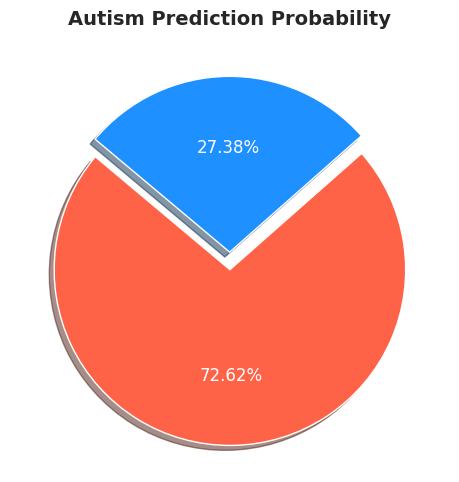

In [174]:
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

def load_model_and_encoders():
    try:
        with open('best_model.pkl', 'rb') as model_file:
            model = pickle.load(model_file)

        with open('label_encoders.pkl', 'rb') as encoder_file:
            label_encoders = pickle.load(encoder_file)

        return model, label_encoders

    except FileNotFoundError as e:
        print(f"❌ Error loading files: {e}")
        return None, None

def preprocess_input(user_input, label_encoders):
    FEATURES = [
        'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
        'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
        'age', 'gender', 'ethnicity', 'jaundice', 'austim',
        'contry_of_res', 'used_app_before', 'result', 'relation'
    ]
    CATEGORICAL_FEATURES = [
        'gender', 'ethnicity', 'jaundice', 'austim',
        'contry_of_res', 'used_app_before', 'relation'
    ]
    processed_data = {}
    for feature in FEATURES:
        if feature in user_input:
            value = user_input[feature]

            if feature in CATEGORICAL_FEATURES and feature in label_encoders:
                try:
                    processed_data[feature] = label_encoders[feature].transform([value])[0]
                except ValueError:
                    processed_data[feature] = 0  # Default value for unknown categories
            else:
                processed_data[feature] = float(value)
        else:
            processed_data[feature] = 0

    return processed_data

def predict_autism(user_input, model, label_encoders):
    if model is None or label_encoders is None:
        return {"error": "Model or encoders not loaded"}

    processed_input = preprocess_input(user_input, label_encoders)
    input_df = pd.DataFrame([processed_input])
    input_df = input_df.reindex(columns=processed_input.keys(), fill_value=0)
    try:
        # Make prediction
        prediction = model.predict(input_df)[0]
        prediction_proba = model.predict_proba(input_df)[0]

        confidence_no_asd = prediction_proba[0] * 100
        confidence_asd = prediction_proba[1] * 100

        # Risk Level based on confidence
        if confidence_asd >= 80:
            risk_level = "HIGH RISK"
        elif confidence_asd >= 60:
            risk_level = "MODERATE RISK"
        elif confidence_asd >= 40:
            risk_level = "LOW-MODERATE RISK"
        else:
            risk_level = "LOW RISK"

        return {
            'prediction': int(prediction),
            'prediction_label': 'ASD (Autism)' if prediction == 1 else 'No ASD',
            'confidence_no_asd': round(confidence_no_asd, 2),
            'confidence_asd': round(confidence_asd, 2),
            'risk_level': risk_level
        }

    except Exception as e:
        return {"error": f"Prediction failed: {str(e)}"}

def display_pie_chart(confidence_asd, confidence_no_asd):
    labels = ['Autism', 'Not Autism']
    sizes = [confidence_asd, confidence_no_asd]
    colors = ['#FF6347', '#1E90FF']
    explode = (0.1, 0)

    plt.figure(figsize=(5,5))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140,
            explode=explode, shadow=True, textprops={'fontsize': 12, 'color': 'white'})
    plt.title("Autism Prediction Probability", fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    # Load the model and encoders
    model, label_encoders = load_model_and_encoders()

    # Example Input for Prediction
    user_input = {
        'A1_Score': 1, 'A2_Score': 1, 'A3_Score': 1, 'A4_Score': 1, 'A5_Score': 1,
        'A6_Score': 1, 'A7_Score': 1, 'A8_Score': 1, 'A9_Score': 1, 'A10_Score': 1,
        'age': 8, 'gender': 'f', 'ethnicity': 'White-European', 'jaundice': 'yes',
        'austim': 'no', 'contry_of_res': 'United States', 'used_app_before': 'no',
        'result': 6, 'relation': 'Parent'
    }
    result = predict_autism(user_input, model, label_encoders)

    if 'error' in result:
        print(f"\n❌ Prediction Error: {result['error']}")
        return

    print("\n🔮 PREDICTION RESULTS:")
    print("-" * 25)
    print(f"Prediction: {result['prediction_label']}")
    print(f"ASD Probability: {result['confidence_asd']}%")
    print(f"No ASD Probability: {result['confidence_no_asd']}%")
    print(f"Risk Level: {result['risk_level']}\n")

    display_pie_chart(result['confidence_asd'], result['confidence_no_asd'])

if __name__ == "__main__":
    main()
